<a href="https://colab.research.google.com/github/KazukiHirata-sun/ITSS-react-drf-basic/blob/main/section_1/Regression_with_AutoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bike Sharing Demand
Use the PyCaret library to implement machine learning with [AutoML](https://www.automl.org/automl/).
Predict the number of bike rentals.
The prediction results from the trained model can be saved to a csv file and submitted to [Kaggle](https://www.kaggle.com/).

**Regression：https://www.simplilearn.com/regression-vs-classification-in-machine-learning-article?tag=Regression**

## Installation of PyCaret
Install [PyCaret](https://pycaret.gitbook.io/docs/), a library that supports AutoML, specifying the version.

In [ ]:
!pip install pycaret==2.3.6
!pip install pandas-profiling==3.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pycaret.utils import enable_colab

enable_colab()

Colab mode enabled.


## Read the files
Dowload the Titanic passenger data from the following page and upload "train.csv" and "test.csv" to your Google Clab.

https://www.kaggle.com/c/bike-sharing-demand/data

The train data has a "Survived" column to indicate if a passenger survived, but the test data does not.
You will need to submit the results of the test data input into the trained model.

In [ ]:
import numpy as np
import pandas as pd

train_data = pd.read_csv("input/train.csv")  # train data
test_data = pd.read_csv("input/test.csv") # test data

train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## Setup PyCaret's environment

`setup()` function initializes the PyCaret environment, but must be called before any other PyCaret functions are executed.

If the data type is OK, you can enter a blank to complete the setup.

We exclude `datetime, casual, registered` for the following reasons

*   `datetime` timestamps have no value as features.
*   `casual, registered` casual + registered = count, so only count is considered.

https://pycaret.gitbook.io/docs/get-started/preprocessing/data-preparation#parameters

In [ ]:
from pycaret.regression import setup

clf = setup(data=train_data, target="count", session_id=123,
            ignore_features = ['datetime','casual','registered'])

,Description,Value
0,session_id,123
1,Target,count
2,Original Data,"(10886, 12)"
3,Missing Values,False
4,Numeric Features,4
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(7620, 13)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True,
                                      features_todrop=['datetime', 'casual',
                                                       'registered'],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='count',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_n...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),


## Model Performance Comparison
Compare various models to evaluate their performance.

`compare_models()` function trains with all models in the library and evaluates their scores.

https://pycaret.gitbook.io/docs/get-started/functions/train?q=compare_models



In [ ]:
from pycaret.regression import compare_models

best_model = compare_models() 

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,107.3057,21306.2388,145.8555,0.3531,1.2929,4.4044,0.098
gbr,Gradient Boosting Regressor,109.5940,21927.9920,147.9908,0.3340,1.3146,4.5806,0.359
rf,Random Forest Regressor,109.5674,23352.1352,152.6737,0.2911,1.2651,4.0891,2.007
lr,Linear Regression,115.2976,23654.9764,153.7249,0.2814,1.3493,4.7144,0.307
ridge,Ridge Regression,115.2970,23654.9401,153.7248,0.2814,1.3493,4.7147,0.020
br,Bayesian Ridge,115.2813,23655.7161,153.7278,0.2814,1.3490,4.7248,0.024
lasso,Lasso Regression,115.2590,23667.8137,153.7695,0.2810,1.3489,4.7453,0.024
en,Elastic Net,116.5440,24225.1179,155.5691,0.2640,1.3695,4.9744,0.034
huber,Huber Regressor,111.6727,24501.2466,156.4295,0.2561,1.2895,3.8466,0.228
lar,Least Angle Regression,117.7225,24707.0450,157.0003,0.2496,1.3599,4.7497,0.025


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:compare_models() succesfully completed......................................


With just one line of code, we were able to train and evaluate over 15 machine learning models.

A summary of the best scoring models is shown below.

In [ ]:
print(best_model)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


## Build Models
`models()` function allows you to see all available machine learning models.

https://pycaret.gitbook.io/docs/get-started/functions/others#models

In [ ]:
from pycaret.regression import models

models()

INFO:logs:gpu_param set to False


,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


`create_model()` function trains and evaluates individual models using "[cross-validation](https://machinelearningmastery.com/k-fold-cross-validation/#:~:text=Cross%2Dvalidation%20is%20a%20resampling,k%2Dfold%20cross%2Dvalidation.)".

In this case, we will create a model for the [Light Gradient Boosting Machine](https://github.com/microsoft/LightGBM), which had the highest accuracy.

https://pycaret.gitbook.io/docs/get-started/functions/train#create_model


In [ ]:
from pycaret.regression import create_model

gbdt = create_model("lightgbm")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,113.1951,23954.2613,154.7716,0.3348,1.2763,4.3120
1,113.6470,24475.4561,156.4463,0.2924,1.3191,4.7957
2,105.4508,19564.0042,139.8714,0.3700,1.2966,4.1805
3,104.5036,20381.8470,142.7650,0.3615,1.2319,3.6572
4,105.2491,20468.2994,143.0675,0.3249,1.2752,4.2107
5,108.0376,22120.3963,148.7293,0.3638,1.3419,4.8471
6,107.4737,21239.3464,145.7373,0.3745,1.3040,4.5693
7,102.4618,18919.8910,137.5496,0.3839,1.2987,4.3469
8,105.7221,20972.2031,144.8178,0.3634,1.2118,3.5284
9,107.3165,20966.6828,144.7988,0.3623,1.3739,5.5959


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 3
INFO:logs:LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
 print(gbdt) ## Trained Model Overview

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


## Hyperparameter tuning
`tune_model()` function is used to optimize hyperparameters.

https://pycaret.gitbook.io/docs/get-started/functions/optimize#tune_model

In [ ]:
from pycaret.regression import tune_model

tuned_gbdt = tune_model(gbdt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,114.2023,24358.5672,156.0723,0.3236,1.2877,4.4028
1,112.9799,24149.8040,155.4021,0.3018,1.3159,4.7629
2,106.3253,19854.1131,140.9046,0.3607,1.2873,4.1143
3,107.2530,21293.7750,145.9239,0.3330,1.2558,3.6954
4,105.7648,20340.9964,142.6219,0.3291,1.2701,3.9762
5,108.7680,22175.8525,148.9156,0.3622,1.3579,5.0373
6,107.5894,21369.1198,146.1818,0.3707,1.3034,4.5642
7,103.8306,18893.5265,137.4537,0.3847,1.3273,4.4359
8,109.4159,21685.0206,147.2583,0.3418,1.2234,3.5049
9,109.7690,21667.5501,147.1990,0.3410,1.3909,5.7738


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 4
INFO:logs:LGBMRegressor(bagging_fraction=0.7, bagging_freq=6, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=66, min_child_weight=0.001, min_split_gain=0.4,
              n_estimators=90, n_jobs=-1, num_leaves=90, objective=None,
              random_state=123, reg_alpha=0.0005, reg_lambda=0.1, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
print(tuned_gbdt)

LGBMRegressor(bagging_fraction=0.7, bagging_freq=6, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=66, min_child_weight=0.001, min_split_gain=0.4,
              n_estimators=90, n_jobs=-1, num_leaves=90, objective=None,
              random_state=123, reg_alpha=0.0005, reg_lambda=0.1, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


## Analys model
Plot the importance of each feature using `plot_model()` function.

https://pycaret.gitbook.io/docs/get-started/functions/analyze#plot_model


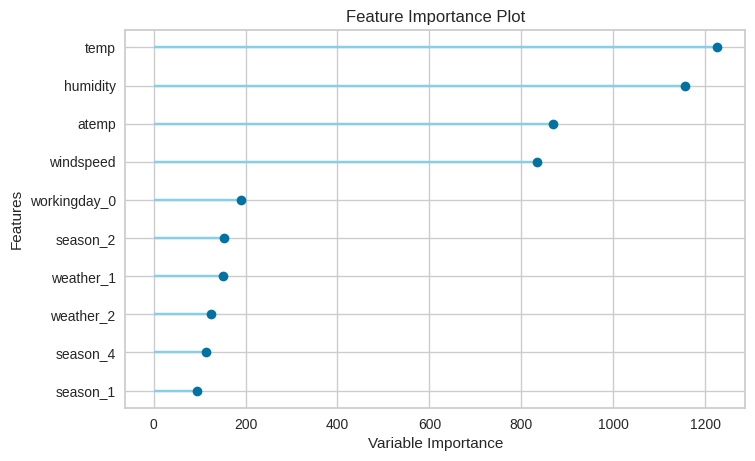

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
from pycaret.regression import plot_model

plot_model(tuned_gbdt, plot="feature")

## Build models for submission to Kaggle
`finalize_model()` function trains the model with all the training data and creates a model for production.

In [ ]:
from pycaret.regression import finalize_model

final_gbdt = finalize_model(tuned_gbdt)
print(final_gbdt)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=LGBMRegressor(bagging_fraction=0.7, bagging_freq=6, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=66, min_child_weight=0.001, min_split_gain=0.4,
              n_estimators=90, n_jobs=-1, num_leaves=90, objective=None,
              random_state=123, reg_alpha=0.0005, reg_lambda=0.1, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), fit_kwargs=None, groups=None, model_only=True, display=None)
INFO:logs:Finalizing LGBMRegressor(bagging_fraction=0.7, bagging_freq=6, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=66, min_child_weight=0.001, min_split_gain=0.4,
         

LGBMRegressor(bagging_fraction=0.7, bagging_freq=6, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=66, min_child_weight=0.001, min_split_gain=0.4,
              n_estimators=90, n_jobs=-1, num_leaves=90, objective=None,
              random_state=123, reg_alpha=0.0005, reg_lambda=0.1, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


Predictions are made using test data.

Prediction results will include a "Label" column representing the predicted value.

In [ ]:
from pycaret.regression import predict_model

test_pred = predict_model(final_gbdt, data=test_data)  # Prediction
test_pred.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMRegressor(bagging_fraction=0.7, bagging_freq=6, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=66, min_child_weight=0.001, min_split_gain=0.4,
              n_estimators=90, n_jobs=-1, num_leaves=90, objective=None,
              random_state=123, reg_alpha=0.0005, reg_lambda=0.1, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Label
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,128.696601
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,39.495469
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,39.495469
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,69.384048
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,69.384048


Save the csv file for submission to Kaggle.

In [ ]:
test_pred['Label'][test_pred['Label']<0]=0 
subm_data = test_pred[["datetime", "Label"]]  # Extract the required columns.

subm_data = subm_data.rename(columns={"Label" : "count"})  

# Save the csv file
subm_data.to_csv("submission_bikerental.csv", index=False)

subm_data

,datetime,count
0,2011-01-20 00:00:00,128.696601
1,2011-01-20 01:00:00,39.495469
2,2011-01-20 02:00:00,39.495469
3,2011-01-20 03:00:00,69.384048
4,2011-01-20 04:00:00,69.384048
...,...,...
6488,2012-12-31 19:00:00,128.495057
6489,2012-12-31 20:00:00,128.495057
6490,2012-12-31 21:00:00,81.476175
6491,2012-12-31 22:00:00,60.949806
